# Applying graph analysis techniques to the MSS dataset


## Team Members: Bassem, Ganesh, Pierre
#  
#  

# Project objectives:

## - Use graph analysis techniques to investigate contents of the MSS dataset
## - Attempt to identify clusters
## - Generate a song recommendation algorithm
#    
#  



# Project approach:
## - Generate row-wise data frames from MSS dataset
## - Generate graphs using data frames
## - Apply algorithms at graph, node and edge levels
#  
#  

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import MSS data frame with selection of columns

In [2]:
save_load_path = "D:\Documents\B\Bentley\Coursework\MA755\MillionSongSubset\Graph"
mss_df = pd.read_pickle(save_load_path+'/song_metadata.pkl')

In [132]:
print('shape:',mss_df.shape)
print('columns:',mss_df.columns.values)
mss_df.dtypes

shape: (10000, 16)
columns: ['artist_id' 'artist_name' 'artist_location' 'genre' 'artist_familiarity'
 'artist_hotttnesss' 'song_id' 'title' 'song_hotttnesss' 'track_id'
 'duration' 'key' 'loudness' 'mode' 'danceability' 'tempo']


artist_id              object
artist_name            object
artist_location        object
genre                  object
artist_familiarity    float64
artist_hotttnesss     float64
song_id                object
title                  object
song_hotttnesss       float64
track_id               object
duration              float64
key                     int32
loudness              float64
mode                    int32
danceability          float64
tempo                 float64
dtype: object

# Make modifications to data frame to help the creation of the graphs:
- Add columns that will be used as relationships
- Change values of Mode and Key so they are different, otherwise when we later merge the graphs NetworkX can't tell the difference between Mode zero and Key zero. This can result in 2 edges from one song to the node "0" if the song happens to have a key of 0 as well as a mode of 0


In [4]:
mss_df['rel_Key'] = 'Key'
mss_df['rel_Sang'] = 'Sang'
mss_df['rel_Mode'] = 'Mode'
mss_df['key'] = 'Key_' + mss_df['key'].astype(str)
mss_df['mode'] = 'Mode_' + mss_df['mode'].astype(str)
mss_df.head(5)

,artist_id,artist_name,artist_location,genre,artist_familiarity,artist_hotttnesss,song_id,title,song_hotttnesss,track_id,duration,key,loudness,mode,danceability,tempo,rel_Key,rel_Sang,rel_Mode
0,b'ARD7TVE1187B99BFB1',b'Casual',b'California - LA',b'',0.581794,0.401998,b'SOMZWCG12A8C13C480',"b""I Didn't Mean To""",0.602120,b'TRAAAAW128F429D538',218.93179,Key_Key_1,-11.197,Mode_Mode_0,0,92.198,Key,Sang,Mode
1,b'ARMJAGH1187FB546F3',b'The Box Tops',"b'Memphis, TN'",b'',0.630630,0.417500,b'SOCIWDW12A8C13D406',b'Soul Deep',NaN,b'TRAAABD128F429CF47',148.03546,Key_Key_6,-9.843,Mode_Mode_0,0,121.274,Key,Sang,Mode
2,b'ARKRRTF1187B9984DA',b'Sonora Santanera',b'',b'',0.487357,0.343428,b'SOXVLOJ12AB0189215',b'Amor De Cabaret',NaN,b'TRAAADZ128F9348C2E',177.47546,Key_Key_8,-9.689,Mode_Mode_1,0,100.070,Key,Sang,Mode
3,b'AR7G5I41187FB4CE6C',b'Adam Ant',"b'London, England'",b'',0.630382,0.454231,b'SONHOTT12A8C13493C',b'Something Girls',NaN,b'TRAAAEF128F4273421',233.40363,Key_Key_0,-9.013,Mode_Mode_1,0,119.293,Key,Sang,Mode
4,b'ARXR32B1187FB57099',b'Gob',b'',b'',0.651046,0.401724,b'SOFSOCN12A8C143F5D',b'Face the Ashes',0.604501,b'TRAAAFD128F92F423A',209.60608,Key_Key_2,-4.501,Mode_Mode_1,0,129.738,Key,Sang,Mode


In [5]:
save_load_path = "D:/Documents/B/Bentley/Coursework/MA755/MillionSongSubset/Graph"
artist_terms = pd.read_pickle(save_load_path+'/artist_terms.pkl')

In [6]:
artist_terms.head(11)

,artist_id,artist_terms_0,artist_term_weight0,relationship
0,b'ARD7TVE1187B99BFB1',b'hip hop',1.000000,Artist_term
1,b'ARD7TVE1187B99BFB1',b'underground rap',0.897936,Artist_term
2,b'ARD7TVE1187B99BFB1',b'g funk',0.884262,Artist_term
3,b'ARD7TVE1187B99BFB1',b'alternative rap',0.842630,Artist_term
4,b'ARD7TVE1187B99BFB1',b'gothic rock',0.842563,Artist_term
5,b'ARMJAGH1187FB546F3',b'blue-eyed soul',1.000000,Artist_term
6,b'ARMJAGH1187FB546F3',b'pop rock',0.845988,Artist_term
7,b'ARMJAGH1187FB546F3',b'blues-rock',0.830690,Artist_term
8,b'ARMJAGH1187FB546F3',b'beach music',0.799291,Artist_term
9,b'ARMJAGH1187FB546F3',b'soft rock',0.788274,Artist_term


In [6]:
similar_artists = pd.read_pickle(save_load_path+'/similar_artists.pkl')
similar_artists.shape, similar_artists.columns

((50000, 3),
 Index(['artist_id', 'similar_artist_0', 'relationship'], dtype='object'))

In [8]:
similar_artists.head(11)

,artist_id,similar_artist_0,relationship
0,b'ARD7TVE1187B99BFB1',b'ARV4KO21187FB38008',Similar_artist
1,b'ARD7TVE1187B99BFB1',b'ARWHM281187FB3D381',Similar_artist
2,b'ARD7TVE1187B99BFB1',b'ARJGOG11187B98D89F',Similar_artist
3,b'ARD7TVE1187B99BFB1',b'AR9ODB41187FB459B2',Similar_artist
4,b'ARD7TVE1187B99BFB1',b'ARXM6VQ1187FB5B1E0',Similar_artist
5,b'ARMJAGH1187FB546F3',b'ARSZWK21187B9B26D7',Similar_artist
6,b'ARMJAGH1187FB546F3',b'ARLDW2Y1187B9B544F',Similar_artist
7,b'ARMJAGH1187FB546F3',b'ARG0TXR1187FB4E708',Similar_artist
8,b'ARMJAGH1187FB546F3',b'AR6Z8OF1187FB5216E',Similar_artist
9,b'ARMJAGH1187FB546F3',b'ARUAG4R1187FB53500',Similar_artist


# Create 3 graphs, each for a single type of relationship

In [7]:
Sang=nx.Graph()
Sang=nx.from_pandas_dataframe(mss_df, 'artist_id', 'song_id', edge_attr='rel_Sang')

Sang.name="Sang"
print(nx.info(Sang))

Name: Sang
Type: Graph
Number of nodes: 13888
Number of edges: 10000
Average degree:   1.4401


In [8]:
Similar_artists=nx.Graph
Similar_artists=nx.from_pandas_dataframe(similar_artists, 'artist_id', 'similar_artist_0', edge_attr='relationship')

Similar_artists.name="Similar_artists"
print(nx.info(Similar_artists))

Name: Similar_artists
Type: Graph
Number of nodes: 13681
Number of edges: 19102
Average degree:   2.7925


In [9]:
Terms=nx.Graph
Terms=nx.from_pandas_dataframe(artist_terms, 'artist_id', 'artist_terms_0', edge_attr='relationship')

Terms.name="Terms"
print(nx.info(Terms))

Name: Terms
Type: Graph
Number of nodes: 4808
Number of edges: 18848
Average degree:   7.8403


## Merge 3 graphs created above 
###    Result is  'Complete' graph which combines all Songs, Artists,  first 5 similar artists and top 5 artist terms

In [10]:
Songs_Artists=nx.Graph()
Songs_Artists=nx.compose(Sang, Similar_artists)

Songs_Artists.name="Songs_Artists"


Complete=nx.Graph()
Complete=nx.compose(Songs_Artists, Terms)

Complete.name="Complete"
print(nx.info(Complete))

Name: Complete
Type: Graph
Number of nodes: 24604
Number of edges: 47950
Average degree:   3.8977


## Check contents by visualizing subgraph

In [13]:
# Create subgraph composed of the simple paths between 2 songs of interest
gs=nx.Graph()

for item in nx.all_simple_paths(Complete, b'SOJRXUV12A8C136CA0', b'SOZZBDC12A8C146917', cutoff=5):
    gs.add_path(item)

print(nx.info(gs))

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 10
Average degree:   2.8571


In [14]:
for row in similar_artists['similar_artist_0']:
    if row in gs:
        gs.node[row]['Type'] = 'Artist'
        gs.node[row]['Similar_artist'] = 'True'
        gs.node[row]['color'] = 'b'
        
for row in mss_df['artist_id']:
    if row in gs:
        gs.node[row]['Type'] = 'Artist'
        gs.node[row]['Original_Artist'] = 'True'
        gs.node[row]['color'] = 'g'
    
for row in mss_df['song_id']:
    if row in gs:
        gs.node[row]['type'] = 'Song'
        gs.node[row]['color'] = 'r'
    
for row in artist_terms['artist_terms_0']:
    if row in gs:
        gs.node[row]['Type'] = 'Term'
        gs.node[row]['color'] = 'b'

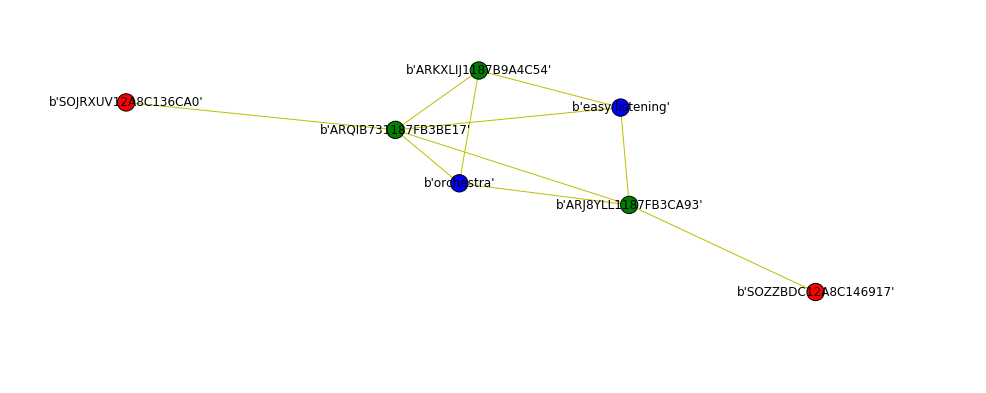

In [16]:
plt.figure(num=None, figsize=(13, 5), dpi=80)

fig = plt.figure(1)
nx.draw_spring(gs,  edge_color = 'y', 
               node_color = [gs.node[node]['color'] for node in gs],
               with_labels=True)

plt.draw() 

# Graph level analysis

## [Transitivity](http://networkx.readthedocs.io/en/stable/reference/generated/networkx.algorithms.cluster.transitivity.html):
    - The ratio of existing to possible triangles present in the graph
    

## [Density](http://networkx.readthedocs.io/en/stable/reference/generated/networkx.classes.function.density.html): 
    - The ratio of existing to possible edges present in the graph.   
      The density is 0 for a graph without edges and 1 for a complete graph. 


In [17]:
g_list=(Sang,Similar_artists,Terms,Complete)

In [18]:
for item in g_list:
    print('transitivity and Density:', item.name, nx.transitivity(item), nx.density(item))

transitivity and Density: Sang 0.0 0.00010370073924523782
transitivity and Density: Similar_artists 0.09908977801060834 0.0002041290884057841
transitivity and Density: Terms 0.0 0.0016310102398505784
transitivity and Density: Complete 0.021222923994421782 0.00015842540360300536


## plot histogram of graph's degree distributions


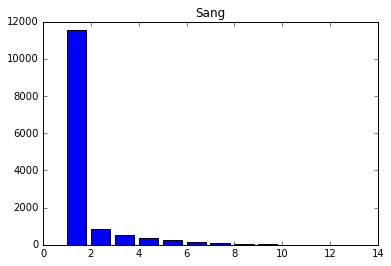

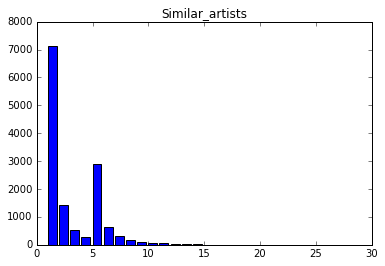

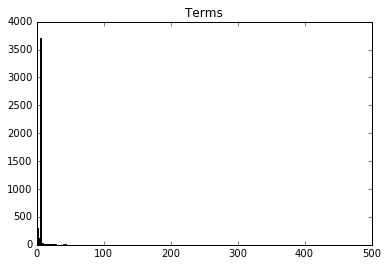

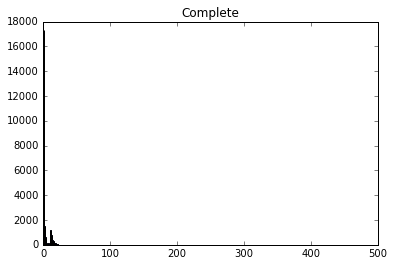

In [19]:
for item in g_list:
    hist=nx.degree_histogram(item)
    plt.bar(range(0,len(hist)), hist)
    plt.title(item.name)
    plt.show()

## Further explanation of degree distribution

In [20]:
for item in g_list:
    hist=(nx.degree_histogram(item))
    print('In graph',item.name, 'the max degree is',len(hist), 'and',\
          sum(hist[:10]), 'of',sum(hist),'nodes have 10 or less neighbors =',\
          round(sum(hist[:10])/sum(hist),4)*100,"%" )

In graph Sang the max degree is 14 and 13861 of 13888 nodes have 10 or less neighbors = 99.81 %
In graph Similar_artists the max degree is 28 and 13438 of 13681 nodes have 10 or less neighbors = 98.22 %
In graph Terms the max degree is 481 and 4420 of 4808 nodes have 10 or less neighbors = 91.93 %
In graph Complete the max degree is 481 and 20407 of 24604 nodes have 10 or less neighbors = 82.94 %


# Song recommendations (based on a song you like as a starting point)

- ### Function developed to traverse graph looking for connected nodes of type song
- ### Function parameters are song of interest and depth of traversal (hops)

In [150]:
def reco_engine_summary(song,max_hops):
    rec_counter = 0
    rg=nx.Graph()
    for hops in range(max_hops+1):
        r = nx.single_source_shortest_path_length(Complete ,source=song, cutoff=hops)
        for node in r:
            if node not in Similar_artists:
                if node not in Terms:
                    if node != song:
                        if node not in nx.single_source_shortest_path_length(Complete ,source=song, cutoff=hops-1):
                            rec_counter +=1
                            #print(node,hops)
                            for path in nx.all_simple_paths(Complete, song, node, cutoff=hops):
                                rg.add_path(path)

        print(rec_counter, 'songs found within a distance of',hops,'edges')
    print(' ')
    print(nx.info(rg))


def reco_engine_graph(song,max_hops):
    rec_counter = 0
    rg=nx.Graph()
    for hops in range(1,max_hops+1):
        r = nx.single_source_shortest_path_length(Complete ,source=song, cutoff=hops)
        for node in r:
            if node not in Similar_artists:
                if node != song:
                        rec_counter +=1
                        #print(node,hops)
                        for path in nx.all_simple_paths(Complete, song, node, cutoff=hops):
                            rg.add_path(path)

        #print(rec_counter, 'songs found within a distance of',hops,'edges')
    print(' ')
    print(nx.info(rg))
    
    plt.figure(num=None, figsize=(13, 5), dpi=80)
    
    for row in similar_artists['similar_artist_0']:
        if row in rg:
            rg.node[row]['type'] = 'Artist'
            rg.node[row]['Similar_artist'] = 'True'
            rg.node[row]['color'] = 'b'
        
    for row in mss_df['artist_id']:
        if row in rg:
            rg.node[row]['type'] = 'Artist'
            rg.node[row]['Original_Artist'] = 'True'
            rg.node[row]['color'] = 'g'
    
    for row in mss_df['song_id']:
        if row in rg:
            rg.node[row]['type'] = 'Song'
            rg.node[row]['color'] = 'r'
            #rg.node[row]['title'] = str(list(mss_df[(mss_df.song_id == node)]['title'])[0])
                                        
    for row in artist_terms['artist_terms_0']:
        if row in rg:
            rg.node[row]['type'] = 'Term'
            rg.node[row]['color'] = 'b'
    
    fig = plt.figure(1)
    nx.draw_spring(rg,  edge_color = 'y', 
               node_color = [rg.node[node]['color'] for node in rg],
               with_labels=True,
               node_labels = [rg.node[node]['type'] for node in rg])

    plt.draw()

def reco_engine_detail(song,max_hops):
    rec_counter = 0
    rg=nx.Graph()
    for hops in range(1,max_hops+1):
        r = nx.single_source_shortest_path_length(Complete ,source=song, cutoff=hops)
        for node in r:
            if node not in Similar_artists:
                if node not in Terms:
                    if node != song:
                        if node not in nx.single_source_shortest_path_length(Complete ,source=song, cutoff=hops-1):
                            rec_counter +=1
                            print(hops,"edges away:",node, list(mss_df[(mss_df.song_id == node)]['title']))
                    
    print(rec_counter, 'songs found within a distance of',hops,'edges')
    

In [115]:
reco_engine_summary(b'SOJRXUV12A8C136CA0',5)

0 songs found within a distance of 0 edges
0 songs found within a distance of 1 edges
1 songs found within a distance of 2 edges
6 songs found within a distance of 3 edges
694 songs found within a distance of 4 edges
1888 songs found within a distance of 5 edges
 
Name: 
Type: Graph
Number of nodes: 2599
Number of edges: 2759
Average degree:   2.1231


 
Name: 
Type: Graph
Number of nodes: 21
Number of edges: 24
Average degree:   2.2857


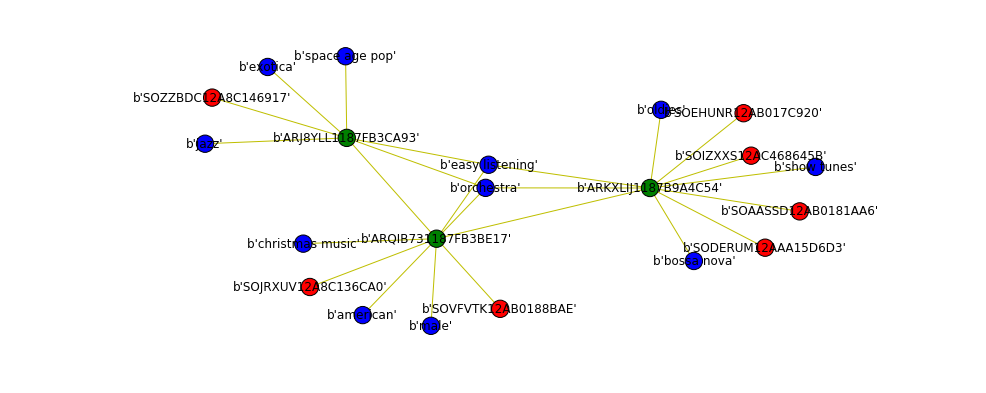

In [152]:
reco_engine_graph(b'SOJRXUV12A8C136CA0',3)

In [105]:
reco_engine_detail(b'SOJRXUV12A8C136CA0',3)

2 edges away: b'SOVFVTK12AB0188BAE' [b'Doctrines']
3 edges away: b'SOEHUNR12AB017C920' [b'The Song From Moulin Rouge']
3 edges away: b'SODERUM12AAA15D6D3' [b'Standing On The Corner']
3 edges away: b'SOAASSD12AB0181AA6' [b'Song From Moulin Rouge']
3 edges away: b'SOZZBDC12A8C146917' [b'Fall River Legend: Conversation: Morton Gould/Agnes de Mille']
3 edges away: b'SOIZXXS12AC468645B' [b'Damisela Encantadora']
6 songs found within a distance of 3 edges


## - [Node Similarity: The Jaccard coefficient](http://networkx.readthedocs.io/en/stable/reference/generated/networkx.algorithms.link_prediction.jaccard_coefficient.html)

The ratio of the intersection to the union of the neighbors of two specific nodes

In [111]:
preds = nx.jaccard_coefficient(Complete, [(b'rock', b'blues'), (b'rock', b'pop rock'), (b'rock', b'salsa')])
for u, v, p in preds:
    print(u,v,p)

b'rock' b'blues' 0.03333333333333333
b'rock' b'pop rock' 0.09375
b'rock' b'salsa' 0.0017793594306049821


Rock and pop rock have 90 times more common neighbors than rock and salsa


This approach however doesn't work well for songs given our graph structure



In [112]:
preds = nx.jaccard_coefficient(Complete, [(b'SOAPMKZ12A58A764B7', b'SONHOTT12A8C13493C'), \
                                          (b'SOAPMKZ12A58A764B7', b'SOZWTCR12A58A7BA31')])
for u, v, p in preds:
    print(u,v,p)

b'SOAPMKZ12A58A764B7' b'SONHOTT12A8C13493C' 0.0
b'SOAPMKZ12A58A764B7' b'SOZWTCR12A58A7BA31' 1.0


In [113]:
test=nx.Graph()

for item in nx.all_simple_paths(Terms, b'orchestra', b'easy listening', cutoff=5):
    test.add_path(item)

print(nx.info(test))

Name: 
Type: Graph
Number of nodes: 308
Number of edges: 865
Average degree:   5.6169


In [116]:
jac_matrix= pd.DataFrame()

#a= pd.DataFrame()
for node in Complete:
    if node not in Songs_Artists:
        for node2 in test:
                if node > node2:
                    if node2 not in Songs_Artists:
                        preds = nx.jaccard_coefficient(Complete, [(node, node2)])
                        for u, v, p in preds:
                                #if p >= 0.3:
                                    x = np.array([str(u),str(v),round(float(p),2)])
                                    jac_matrix = jac_matrix.append(pd.DataFrame(x).T)
                
jac_matrix.columns=['Node1','Node2','Jaccard_Coeff']
len(jac_matrix)

32427

In [117]:
jac_matrix.sort_values('Jaccard_Coeff', ascending=False).head(50)

,Node1,Node2,Jaccard_Coeff
0,b'roots reggae',b'reggae',0.45
0,b'roots reggae',b'lovers rock',0.43
0,b'rap',b'hip hop',0.38
0,b'irish folk',b'celtic',0.38
0,b'reggae',b'lovers rock',0.37
0,b'opera',b'bel canto',0.36
0,b'samba',b'bossa nova',0.32
0,b'christian rock',b'ccm',0.29
0,b'roots reggae',b'dub',0.27
0,b'contemporary classical music',b'composer',0.27


In [119]:
jac_matrix.sort_values('Jaccard_Coeff', ascending=False).tail(20)

,Node1,Node2,Jaccard_Coeff
0,b'baroque music',b'acid jazz',0.0
0,b'baroque music',b'ballad',0.0
0,b'reggaeton',b'neoclassical',0.0
0,b'reggaeton',b'funk',0.0
0,b'reggaeton',b'cool jazz',0.0
0,b'reggaeton',b'pop rock',0.0
0,b'reggaeton',b'lovers rock',0.0
0,b'reggaeton',b'chill-out',0.0
0,b'reggaeton',b'celtic',0.0
0,b'reggaeton',b'cabaret',0.0


In [125]:
jac_matrix[(jac_matrix.Node1 == "b'disco'")].sort_values('Jaccard_Coeff', ascending=False)

,Node1,Node2,Jaccard_Coeff
0,b'disco',b'ballad',0.08
0,b'disco',b'chanson',0.03
0,b'disco',b'chill-out',0.02
0,b'disco',b'ccm',0.01
0,b'disco',b'celtic',0.01
0,b'disco',b'cabaret',0.01
0,b'disco',b'acid jazz',0.01
0,b'disco',b'bel canto',0.01
0,b'disco',b'big beat',0.0
0,b'disco',b'concerto',0.0


# [Community analysis](http://perso.crans.org/aynaud/communities/api.html)

See walkthrough [here](http://blog.dominodatalab.com/social-network-analysis-with-networkx/)


 [This is based on the Luvain modularity algorithm](https://en.wikipedia.org/wiki/Louvain_Modularity)


Definition of modularity [Wikipedia page](https://en.wikipedia.org/wiki/Modularity_%28networks%29):

"Modularity is the fraction of the edges that fall within the given groups minus the expected such fraction if edges were distributed at random. The value of the modularity lies in the range [−1/2,1). It is positive if the number of edges within groups exceeds the number expected on the basis of chance. For a given division of the network's vertices into some modules, modularity reflects the concentration of edges within modules compared with random distribution of links between all nodes regardless of modules."

In [12]:
import community as cm

In [237]:
dendrogram = cm.generate_dendrogram(Terms)
len(dendrogram)

3

In [98]:
#first compute the best partition
partition = cm.best_partition(Terms)

In [99]:
#parts = community.best_partition(G_fb)
values = [partition.get(node) for node in Terms.nodes()]
len(set(values))

13

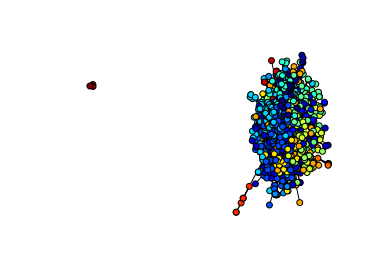

In [260]:
plt.axis("off")
nx.draw_spring(Terms, cmap = plt.get_cmap("jet"), node_color = values,\
                 node_size = 35, with_labels = False)

In [100]:
c=0
for i in range(len(set(values))):
    c += values.count(i)
    print('Cluster', i,'contains',values.count(i),'nodes')
print('Total nodes in clusters =',c)
print('Total nodes in graph =', len(Terms.nodes()))

Cluster 0 contains 669 nodes
Cluster 1 contains 316 nodes
Cluster 2 contains 362 nodes
Cluster 3 contains 687 nodes
Cluster 4 contains 428 nodes
Cluster 5 contains 378 nodes
Cluster 6 contains 1082 nodes
Cluster 7 contains 374 nodes
Cluster 8 contains 227 nodes
Cluster 9 contains 177 nodes
Cluster 10 contains 100 nodes
Cluster 11 contains 5 nodes
Cluster 12 contains 3 nodes
Total nodes in clusters = 4808
Total nodes in graph = 4808


In [101]:
cluster = 11
print('Cluster',cluster,'members')
for key, value in partition.items():
    if value == cluster:
    #print('Cluster',value,':')
        if len(list(mss_df[(mss_df.song_id == key)]['title']))>0:
            print (key,list(mss_df[(mss_df.song_id == key)]['title']))
        elif len(list(mss_df[(mss_df.artist_id == key)]['artist_name']))>0:
            print (key,list(mss_df[(mss_df.artist_id == key)]['artist_name']))
        elif len(similar_artists[(similar_artists.similar_artist_0 == key)].head(1))>0:
            print (key, 'Unknown similar artist')
        else:
            print(key,'term')

Cluster 11 members
b'pinoy rock' term
b'opm' term
b'AR8GEH21187FB4F83E' [b'6CycleMind', b'6CycleMind']
b'pinoy' term
b'filipino' term


In [102]:
part2 = cm.best_partition(Complete)

In [103]:
#parts = community.best_partition(G_fb)
values2 = [part2.get(node) for node in Complete.nodes()]
len(set(values2))

35

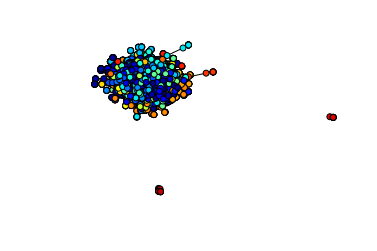

In [110]:
plt.axis("off")
nx.draw_spring(Complete, cmap = plt.get_cmap("jet"), node_color = values2,\
                 node_size = 35, with_labels = False)

In [104]:
c2=0
for j in range(len(set(values2))):
    c2 += values2.count(j)
    print('Cluster', j,'contains',values2.count(j),'nodes')
print('Total nodes in clusters =',c2)
print('Total nodes in graph =', len(Complete.nodes()))

Cluster 0 contains 1097 nodes
Cluster 1 contains 1080 nodes
Cluster 2 contains 2207 nodes
Cluster 3 contains 1914 nodes
Cluster 4 contains 1721 nodes
Cluster 5 contains 1979 nodes
Cluster 6 contains 231 nodes
Cluster 7 contains 1952 nodes
Cluster 8 contains 798 nodes
Cluster 9 contains 1295 nodes
Cluster 10 contains 81 nodes
Cluster 11 contains 1434 nodes
Cluster 12 contains 926 nodes
Cluster 13 contains 1002 nodes
Cluster 14 contains 246 nodes
Cluster 15 contains 1698 nodes
Cluster 16 contains 1220 nodes
Cluster 17 contains 526 nodes
Cluster 18 contains 392 nodes
Cluster 19 contains 593 nodes
Cluster 20 contains 297 nodes
Cluster 21 contains 56 nodes
Cluster 22 contains 333 nodes
Cluster 23 contains 243 nodes
Cluster 24 contains 76 nodes
Cluster 25 contains 621 nodes
Cluster 26 contains 407 nodes
Cluster 27 contains 51 nodes
Cluster 28 contains 15 nodes
Cluster 29 contains 30 nodes
Cluster 30 contains 25 nodes
Cluster 31 contains 8 nodes
Cluster 32 contains 14 nodes
Cluster 33 contain

In [109]:
cluster = 33
print('Cluster',cluster,'members')
for key, value in part2.items():
    if value == cluster:
    #print('Cluster',value,':')
        if len(list(mss_df[(mss_df.song_id == key)]['title']))>0:
            print (key,list(mss_df[(mss_df.song_id == key)]['title']))
        elif len(list(mss_df[(mss_df.artist_id == key)]['artist_name']))>0:
            print (key,list(mss_df[(mss_df.artist_id == key)]['artist_name']))
        elif len(similar_artists[(similar_artists.similar_artist_0 == key)].head(1))>0:
            print (key, 'Unknown similar artist')
        else:
            print(key,'term')

Cluster 33 members
b'AR6WCVL1187B98E79A' Unknown similar artist
b'AR2MXK31187B9B3DB7' Unknown similar artist
b'ARUBDNK11F50C4F28B' [b'Vrse Murphy', b'Vrse Murphy']
b'guitarist' term
b'ARJJWZC12AF7DB28B1' Unknown similar artist
b'AREK8SR1187B9B836E' Unknown similar artist
b'SOGATPI12AC960DCAC' [b"Closin' Moes"]
b'AR1S5QX1187B9B7A2A' Unknown similar artist
b'ARKJWYX11F4C845BE9' Unknown similar artist
b'SOPJETO12AB017BDAF' [b'Unda Da Influence" (Snippets)']
b'AR2KRIZ1187B9BA0A5' Unknown similar artist
b'ARMWP591187B9B1389' Unknown similar artist
b'ARFDBJL122ECCBA188' Unknown similar artist
b'ARVKWVL11F50C4F6DB' Unknown similar artist
b'SOSFOAG12AB018C8A0' [b'Cremona (Instrumental)']
b'AR7FCU51187B9B7D31' Unknown similar artist
b'san francisco bay area' term
b'ARSKEWO122ECCBADEA' Unknown similar artist
b'ARAJTHO11F50C4B80F' [b'Jeff Massanari Trio']
b'ARYGMNP11F4C843096' [b'M Sane']
b'AREBM6U1187FB3EA65' Unknown similar artist
b'SOIPQBF12AB018C890' [b'Wrong Decision (Instrumental)']
b'ARXKM